# Introduction to Scikit-Learn

![](Image/scikit-learn-workflow.png)

### What are covered here:
   * Step-0: An end-to-end Scikit-learn workflow
   * Step-1: Getting data ready    
   * Step-2: Choose the right estimator/algorithm for our problems
   * Step-3: Fit the model
   * Step-4: Make predictions using the model
   * Step-5: Evaluate a model
   * Step-6: Improve a model
   * Step-7: Save and load a trained model
   * Step-8: Putting it all together

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## An end-to-end Scikit-learn workflow

In [2]:
# Get the data
hd = pd.read_csv("Data/scikit-learn-data/heart-disease.csv")
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Create X (features matrix)
X = hd.drop("target", axis=1)

# Create y (labels)
y = hd["target"]

In [4]:
# Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1


In [7]:
y_train

65     1
157    1
89     1
261    0
56     1
      ..
190    0
220    0
22     1
199    0
94     1
Name: target, Length: 242, dtype: int64

In [8]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1


In [9]:
y_test

120    1
169    0
19     1
225    0
18     1
      ..
13     1
278    0
113    1
291    0
207    0
Name: target, Length: 61, dtype: int64

In [10]:
# Train the model

model.fit(X_train, y_train);

In [11]:
# Test the model

y_preds = model.predict(X_test)
y_preds

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [12]:
# Evaluate the model on the training data and test data

model.score(X_train, y_train)

1.0

In [13]:
model.score(X_test, y_test)

0.8032786885245902

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [15]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        25
           1       0.83      0.83      0.83        36

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [16]:
confusion_matrix(y_test, y_preds)

array([[19,  6],
       [ 6, 30]])

In [17]:
accuracy_score(y_test, y_preds)

0.8032786885245902

In [18]:
# Improve the model
# Try different amount of n_estimators

np.random.seed(42)

for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators = i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {model.score(X_test, y_test) * 100:.2f}%")
    print()

Trying model with 10 estimators...
Model accuracy on test set: 80.33%

Trying model with 20 estimators...
Model accuracy on test set: 80.33%

Trying model with 30 estimators...
Model accuracy on test set: 80.33%

Trying model with 40 estimators...
Model accuracy on test set: 80.33%

Trying model with 50 estimators...
Model accuracy on test set: 80.33%

Trying model with 60 estimators...
Model accuracy on test set: 80.33%

Trying model with 70 estimators...
Model accuracy on test set: 80.33%

Trying model with 80 estimators...
Model accuracy on test set: 80.33%

Trying model with 90 estimators...
Model accuracy on test set: 80.33%



In [19]:
# Save the model and load it

import pickle

pickle.dump(model, open("random_forest_model_1.pk1", 'wb'))

In [20]:
loaded_model = pickle.load(open("random_forest_model_1.pk1", 'rb'))
loaded_model.score(X_test, y_test)

0.8032786885245902

In [21]:
import sklearn
sklearn.show_versions()


System:
    python: 3.9.7 (default, Sep 16 2021, 08:50:36)  [Clang 10.0.0 ]
executable: /Users/zunayed/Desktop/ML/proj_practice/env/bin/python
   machine: macOS-10.16-x86_64-i386-64bit

Python dependencies:
          pip: 21.2.4
   setuptools: 58.0.4
      sklearn: 1.0.1
        numpy: 1.21.2
        scipy: 1.7.1
       Cython: None
       pandas: 1.3.4
   matplotlib: 3.5.0
       joblib: 1.1.0
threadpoolctl: 2.2.0

Built with OpenMP: True


## 1. Getting our data to be used with ML
Three main things we have to do:
* Step-1: Split the data into labels (Usually `X` & `y`)
* Step-2: Filling (imputing) or disregarding missing values
* Step-3: Converting non-numerical values to numerical values (feature encoding)

In [22]:
# Import the data

car_sales = pd.read_csv("Data/scikit-learn-data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [23]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [24]:
car_sales["Doors"].value_counts() # though Doors is numerical, we have to consider it as categorical

4    856
5     79
3     65
Name: Doors, dtype: int64

In [25]:
# Split the data into X & y

X = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]

In [26]:
# Transform all data into numerical

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

features = ["Make", "Colour", "Doors"]
encoder = OneHotEncoder()
transformer = ColumnTransformer([("Encoder", encoder, features)],
                                    remainder = "passthrough")

transformedX = transformer.fit_transform(X)

In [27]:
pd.DataFrame(transformedX)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [28]:
# Split transformed X & y into training & test sets

np.random.seed(0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(transformedX,
                                                    y,
                                                    test_size=0.2)

In [29]:
# Build ML model

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [30]:
# Train (fit) the model

model.fit(X_train, y_train);

In [31]:
# Evaluate the model

model.score(X_test, y_test)

0.3385921048142325

## 1.1 Dealing with missing data in ML
Things can be done:
* Fill them with some value (also known as imputiation)
* Remove the samples with missing data altogether 

### 1.1.1 Option 1: Fill missing data with Pandas

In [32]:
car_sales_missing = pd.read_csv("Data/scikit-learn-data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [33]:
car_sales_missing.isna().sum() # shows where how many missing data are there

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [34]:
# Fill with Pandas

car_sales_missing["Make"].fillna("missing", inplace = True)
car_sales_missing["Colour"].fillna("missing", inplace = True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)
car_sales_missing["Doors"].fillna(4, inplace = True)

In [35]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [36]:
car_sales_missing.dropna(inplace = True)

In [37]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [38]:
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [39]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,missing,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

features = ["Make", "Colour", "Doors"]
encoder = OneHotEncoder()
transformer = ColumnTransformer([("Encoder", encoder, features)],
                                    remainder = "passthrough")

transformedX = transformer.fit_transform(car_sales_missing)

### 1.1.2 Option 2: Fill missing data with Scikit-Learn

In [41]:
car_sales_missing = pd.read_csv("Data/scikit-learn-data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [42]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [43]:
# Dropping the rows with missing Price values

car_sales_missing.dropna(subset = ["Price"],
                        inplace = True)

In [44]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [45]:
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [46]:
# Fill with Scikit-Learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

imputer1 = SimpleImputer(strategy = "constant", fill_value = "missing") # for Make & Colour
imputer2 = SimpleImputer(strategy = "constant", fill_value = 4) # for Doors
imputer3 = SimpleImputer(strategy = "mean") # for Odometer

feature1 = ["Make", "Colour"]
feature2 = ["Doors"]
feature3 = ["Odometer (KM)"]

imputer = ColumnTransformer([
    ("imputer1", imputer1, feature1),
    ("imputer2", imputer2, feature2),
    ("imputer3", imputer3, feature3)
])

filledX = imputer.fit_transform(X)
filledX

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [47]:
car_sales_filled = pd.DataFrame(filledX,
                                columns = ["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [48]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

No missing data

In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

features = ["Make", "Colour", "Doors"]
encoder = OneHotEncoder()
transformer = ColumnTransformer([("Encoder", encoder, features)],
                                    remainder = "passthrough")

transformedX = transformer.fit_transform(car_sales_filled)

In [50]:
np.random.seed(1)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformedX, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.25158720734485374

## 2. Choosing the right estimator/algorithm 

* Classification:
    predicting whether a sample is one thing or another.
* Regression:
    predicting a number

![](Image/ml-map.png)

### 2.1 Regression Problem

In [140]:
# Import a built-in dataset
from sklearn.datasets import load_boston
boston = load_boston()

/Users/zunayed/Desktop/ML/proj_practice/env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [52]:
df = pd.DataFrame(boston["data"], columns = boston["feature_names"])
df["target"] = pd.Series(boston["target"])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [53]:
# Number of samples
len(df)

506

In [54]:
# Try: Ridge Regression model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# setup a random seed
np.random.seed(1)

# create data
X = df.drop("target", axis = 1)
y = df["target"]

# split into train & test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

# instantiate the model
rd = Ridge()

# fit the model
rd.fit(Xtrain, ytrain)

# evaluate the model
rd.score(Xtest, ytest)

0.7655800611077143

In [55]:
# Try: Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(2)

X = df.drop("target", axis=1)
y = df["target"]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

rf = RandomForestRegressor()
rf.fit(Xtrain, ytrain)
rf.score(Xtest, ytest)

0.9038944829540848

### 2.2 Classification Problem

In [80]:
heart_disease = pd.read_csv("Data/scikit-learn-data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [81]:
len(heart_disease)

303

In [82]:
# Try: LinearSVC model
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

np.random.seed(3)

X, y = heart_disease.drop("target", axis=1), heart_disease["target"]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

sv = LinearSVC()
sv.fit(Xtrain, ytrain)
sv.score(Xtest, ytest)

/Users/zunayed/Desktop/ML/proj_practice/env/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8032786885245902

In [83]:
# Try: Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(3)

X, y = heart_disease.drop("target", axis=1), heart_disease["target"]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

sv = RandomForestClassifier()
sv.fit(Xtrain, ytrain)
sv.score(Xtest, ytest)

0.8360655737704918

## 3. Fitting the model

* `X` = features, feature variables, data
* `y` = labels, targets, target variables

We use `.fit()` to train the model

## 4. Make predictions using ML model
Two ways to make predictions:
1.  `predict()`: predicts using mean
2. `predict_proba()`: predicts using probability

### 4.1 Use of `predict()`

In [84]:
Xtest.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2


In [85]:
sv.predict(Xtest)

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [86]:
np.array(ytest)

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

In [87]:
# compare
ypred = sv.predict(Xtest)
np.mean(ypred == ytest)

0.8360655737704918

This how `.score()` works

In [88]:
sv.score(Xtest, ytest)

0.8360655737704918

### 4.2 Use of `.predict_proba()`

#### 4.2.1 Use of `.predict_proba()` in classification model

In [89]:
Xtest.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2


In [90]:
a = sv.predict_proba(Xtest)
a[:5]

array([[0.59, 0.41],
       [0.02, 0.98],
       [0.28, 0.72],
       [0.13, 0.87],
       [0.27, 0.73]])

In [91]:
b = sv.predict(Xtest)
b[:5]

array([0, 1, 1, 1, 1])

In [92]:
pd.DataFrame(a, b)

,0,1
0,0.59,0.41
1,0.02,0.98
1,0.28,0.72
1,0.13,0.87
1,0.27,0.73
...,...,...
1,0.40,0.60
1,0.46,0.54
1,0.43,0.57
1,0.27,0.73


#### 4.2.2 Use of `.predict()` in regression models

In [93]:
df # Boston dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [94]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(2)

X = df.drop("target", axis=1)
y = df["target"]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

rf = RandomForestRegressor().fit(Xtrain, ytrain)
ypred = rf.predict(Xtest)

In [95]:
ypred[:10]

array([21.37 , 20.983, 33.335, 30.914,  8.187, 13.09 , 26.739, 28.367,
       27.02 , 20.631])

In [96]:
np.array(ytest[:10])

array([20.2, 15.3, 37.3, 32.5,  8.8, 14.4, 22. , 26.6, 15. , 21.5])

In [97]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, ypred)

2.0778039215686266

It means the model predicts at most 2.0778 units away from the truth

## 5. Evaluating ML model

There are three different APIs for evaluating the quality of the models:
   * Estimator `score` method
   * `Scoring` parameter
   * Problem-specific `Metric` functions

In [99]:
heart_disease = pd.read_csv("Data/scikit-learn-data/heart-disease.csv")

### 5.1 `Score` Method

In [101]:
# Classification Model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(9)

X, y = heart_disease.drop("target", axis=1), heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier().fit(X_train, y_train)

In [102]:
clf.score(X_test, y_test)

0.8032786885245902

In [103]:
# Regression Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(5)

X, y = df.drop("target", axis=1), df["target"] # Boston DataFrame

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf = RandomForestRegressor().fit(X_train, y_train)

In [104]:
rf.score(X_test, y_test)

0.8716632849053344

### 5.2 `Scoring` Parameter

![](Image/cross-validation.png)

In [224]:
# Classification model


from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(28)

X, y = heart_disease.drop("target", axis=1), heart_disease["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier().fit(X_train, y_train)

In [225]:
clf.score(X_test, y_test)

0.8524590163934426

In [226]:
np.random.seed(28)
cv_acc = cross_val_score(clf, X, y, scoring=None) # default cv=5, scoring=None
cv_acc

array([0.86885246, 0.90163934, 0.7704918 , 0.81666667, 0.78333333])

In [227]:
print(f"The cross-validated accuracy is: {np.mean(cv_acc) * 100:.2f}%")

The cross-validated accuracy is: 82.82%


In [228]:
np.random.seed(28)
cv_acc = cross_val_score(clf, X, y, scoring="accuracy")
cv_acc

array([0.86885246, 0.90163934, 0.7704918 , 0.81666667, 0.78333333])

In [229]:
print(f"The cross-validated accuracy is: {np.mean(cv_acc) * 100:.2f}%")

The cross-validated accuracy is: 82.82%


In [231]:
np.random.seed(28)
cv_prec = cross_val_score(clf, X, y, scoring="precision")
cv_prec

array([0.82051282, 0.93548387, 0.78787879, 0.84375   , 0.75      ])

In [232]:
print(f"The cross-validated accuracy is: {np.mean(cv_prec) * 100:.2f}%")

The cross-validated accuracy is: 82.75%


In [233]:
np.random.seed(28)
cv_rec = cross_val_score(clf, X, y, scoring="recall")
cv_rec

array([0.96969697, 0.87878788, 0.78787879, 0.81818182, 0.90909091])

In [234]:
print(f"The cross-validated accuracy is: {np.mean(cv_rec) * 100:.2f}%")

The cross-validated accuracy is: 87.27%


In [235]:
np.random.seed(28)
cv_f1 = cross_val_score(clf, X, y, scoring="f1")
cv_f1

array([0.88888889, 0.90625   , 0.78787879, 0.83076923, 0.82191781])

In [236]:
print(f"The cross-validated accuracy is: {np.mean(cv_f1) * 100:.2f}%")

The cross-validated accuracy is: 84.71%


In [230]:
np.random.seed(28)

# single training and test split score
clf_single_score = clf.score(X_test, y_test)

# mean of 5-fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# compare
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8281967213114754)

In [240]:
# Regression model


from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(28)

X, y = df.drop("target", axis=1), df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
reg = RandomForestRegressor().fit(X_train, y_train)

In [241]:
reg.score(X_test, y_test)

0.7013944763820833

In [247]:
np.random.seed(28)

cv_r2 = cross_val_score(reg, X, y, scoring=None)
np.mean(cv_r2)

0.6222847574772599

In [248]:
np.random.seed(28)

cv_mae = cross_val_score(reg, X, y, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-3.0161051252184032

In [249]:
np.random.seed(28)

cv_mse = cross_val_score(reg, X, y, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.655605270995913

### 5.3 `Metric` Functions

1. Accuracy
2. Area under ROC Curve
3. Confusion Matrix
4. Classification Report

#### 5.3.1 Accuracy

In [116]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(28)

X, y = heart_disease.drop("target", axis=1), heart_disease["target"]

clf = RandomForestClassifier()
cvs = cross_val_score(clf, X, y)
cvs

array([0.86885246, 0.90163934, 0.7704918 , 0.81666667, 0.78333333])

In [115]:
np.mean(cvs)

0.8281967213114754

In [113]:
print(f"Heart Disease Classifier Accuracy: {np.mean(cvs) * 100:.2f}%")

Heart Disease Classifier Accuracy: 82.82%


#### 5.3.2 Area under ROC Curve
* Area under curve (AUC)
* Receiver Operating Characteristic (ROC) curve

ROC curve is a comparison of a model's true positive rate (tpr) vs its false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [119]:
from sklearn.metrics import roc_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model
clf.fit(X_train, y_train)
# make predictions with probabilities
y_prob = clf.predict_proba(X_test)

y_prob[:10], len(y_prob)

(array([[0.17, 0.83],
        [0.81, 0.19],
        [0.99, 0.01],
        [0.55, 0.45],
        [0.01, 0.99],
        [0.85, 0.15],
        [0.15, 0.85],
        [0.92, 0.08],
        [0.9 , 0.1 ],
        [0.05, 0.95]]),
 61)

In [120]:
y_prob_pos = y_prob[:, 1]
y_prob_pos

array([0.83, 0.19, 0.01, 0.45, 0.99, 0.15, 0.85, 0.08, 0.1 , 0.95, 0.19,
       0.79, 0.49, 0.59, 0.61, 0.27, 0.87, 0.8 , 0.66, 0.  , 0.8 , 1.  ,
       0.92, 0.95, 0.62, 0.1 , 0.4 , 0.94, 0.06, 0.77, 0.76, 0.9 , 0.93,
       0.17, 0.61, 0.97, 0.82, 0.99, 0.98, 0.38, 0.08, 0.67, 0.87, 0.81,
       0.89, 0.48, 0.99, 0.26, 0.65, 0.39, 0.76, 0.15, 0.96, 0.05, 0.11,
       0.08, 0.67, 1.  , 0.39, 0.26, 0.93])

In [123]:
# Calculate fpr, tpr and thresholds
fpr, tpr, td = roc_curve(y_test, y_prob_pos)

# check
fpr, tpr, td

(array([0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
        0.03448276, 0.06896552, 0.06896552, 0.06896552, 0.10344828,
        0.10344828, 0.13793103, 0.13793103, 0.13793103, 0.17241379,
        0.17241379, 0.17241379, 0.17241379, 0.24137931, 0.27586207,
        0.27586207, 0.31034483, 0.31034483, 0.34482759, 0.34482759,
        0.37931034, 0.44827586, 0.5862069 , 0.62068966, 0.65517241,
        0.68965517, 0.75862069, 0.86206897, 1.        ]),
 array([0.     , 0.0625 , 0.125  , 0.21875, 0.28125, 0.3125 , 0.34375,
        0.4375 , 0.5    , 0.5    , 0.53125, 0.53125, 0.5625 , 0.625  ,
        0.625  , 0.65625, 0.78125, 0.8125 , 0.8125 , 0.84375, 0.875  ,
        0.875  , 0.90625, 0.90625, 0.9375 , 0.96875, 0.96875, 0.96875,
        0.96875, 1.     , 1.     , 1.     , 1.     , 1.     ]),
 array([2.  , 1.  , 0.99, 0.96, 0.95, 0.94, 0.93, 0.89, 0.87, 0.85, 0.83,
        0.82, 0.81, 0.8 , 0.79, 0.77, 0.67, 0.66, 0.62, 0.61, 0.59, 0.49,
        0.48, 0.45, 0.4 , 0.39, 0.27, 

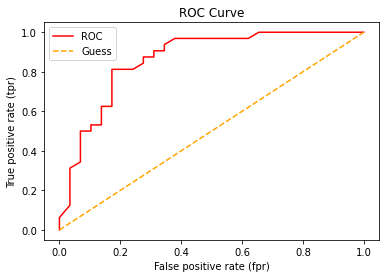

In [134]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # plot ROC curve
    plt.plot(fpr, tpr, color="red", label="ROC")
    
    # plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color="orange", linestyle="--", label="Guess")
    
    # customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

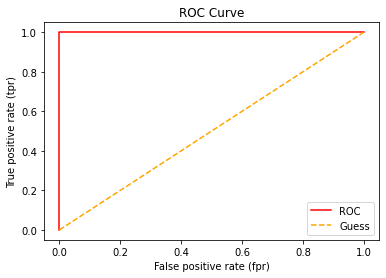

In [136]:
# Plot perfect ROC curve and AUC score

fpr, tpr, td = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [137]:
from sklearn.metrics import roc_auc_score

In [138]:
roc_auc_score(y_test, y_prob_pos)

0.8631465517241379

In [139]:
roc_auc_score(y_test, y_test)

1.0

#### 5.3.3 Confusion Matrix

A confusion matrix is a quick way to compare the labels that a model predicts and the actual labels which it was supposed to predict.

In essence, giving us an idea of where the model is getting confused.

In [142]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[21,  8],
       [ 4, 28]])

In [153]:
# visualize confusion matric with pd.crosstab()

pd.crosstab(y_test, y_pred,
           rownames=["Prediction"],
           colnames=["Truth"])

Truth,0,1
Prediction,,
0,21,8
1,4,28


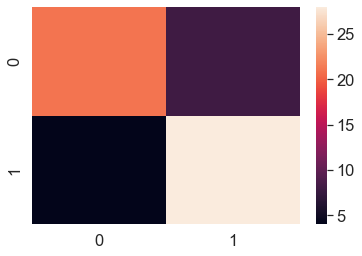

In [148]:
# make it more visual
import seaborn as sb

sb.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_pred)

sb.heatmap(conf_mat);

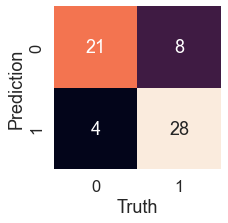

In [155]:
def plot_conf_mat(cpnf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sb.heatmap(conf_mat,
                   annot=True,
                   cbar=False)
    ax.set(xlabel="Truth",
           ylabel="Prediction");

plot_conf_mat(conf_mat)

#### 5.3.4 Classification Report

In [154]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78        29
           1       0.78      0.88      0.82        32

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [162]:
# when precision and recall become IMPORTANT

disease_true = np.zeros(10000)
disease_true[1828] = 1 # one n only positive case

disease_pred = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_pred,
                                  output_dict=True))

/Users/zunayed/Desktop/ML/proj_practice/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zunayed/Desktop/ML/proj_practice/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zunayed/Desktop/ML/proj_practice/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:
* **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
* **Precision** and **recall** become more important when classes are imbalanced (i.e. 0 & 1)
* If false positive predictions are worse than false negatives, aim for **higher precision**
* If false negative predictions are worse than false positives, aim for **higher recall**
* **F1-score** is a combination of precision and recall

### 5.4 Regression model evaluation metrics

1. R^2 or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE

#### 5.4.1 R-squared
It compares our model's predictions to the mean of the targets. Values can range from negative infinity to 1. For example, if all our model does is predict the mean of the targets, its R^2 value would be 0. And if our model perfectly predicts a range of numbers, its R^2 value would be 1.

In [165]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(28)

X, y = df.drop("target", axis=1), df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train);

In [166]:
model.score(X_test, y_test)

0.7013944763820833

In [167]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [168]:
y_test.mean()

21.39607843137255

In [170]:
y_test_mean[:10]

array([21.39607843, 21.39607843, 21.39607843, 21.39607843, 21.39607843,
       21.39607843, 21.39607843, 21.39607843, 21.39607843, 21.39607843])

In [171]:
r2_score(y_test, y_test_mean)

0.0

In [172]:
r2_score(y_test, y_test)

1.0

#### 5.4.2 Mean Absolute Error (MAE)
MAE is the average of the absolute differences between predictions and truths. It gives an idea of how wrong the model's predictions are.

In [179]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

In [180]:
mae

2.671911764705884

In [183]:
mae = pd.DataFrame(data={"Truth": y_test,
                         "Preds": y_pred})

mae["Difference"] = mae["Preds"] - mae["Truth"]
mae

,Truth,Preds,Difference
473,29.8,30.558,0.758
369,50.0,38.622,-11.378
255,20.9,19.145,-1.755
417,10.4,8.451,-1.949
233,48.3,44.346,-3.954
...,...,...,...
392,9.7,10.254,0.554
409,27.5,21.262,-6.238
293,23.9,22.945,-0.955
403,8.3,11.047,2.747


#### 5.4.2 Mean Squared Error (MSE)

In [187]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)

In [188]:
mse

20.67913051960786

In [189]:
mse = pd.DataFrame(data={"Truth": y_test,
                         "Preds": y_pred})

mse["Difference"] = mae["Preds"] - mae["Truth"]
mse

,Truth,Preds,Difference
473,29.8,30.558,0.758
369,50.0,38.622,-11.378
255,20.9,19.145,-1.755
417,10.4,8.451,-1.949
233,48.3,44.346,-3.954
...,...,...,...
392,9.7,10.254,0.554
409,27.5,21.262,-6.238
293,23.9,22.945,-0.955
403,8.3,11.047,2.747


Our aim:
* minimize MAE & MSE
* maximize R-squared

### 5.5 Using different evaluation metrics as Scikit-Learn functions

In [258]:
from sklearn.model_selection import train_test_split

In [259]:
# Classification Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

np.random.seed(28)

X, y = heart_disease.drop("target", axis=1), heart_disease["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_test)

print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds):.2f}")
print(f"Recall: {recall_score(y_test, y_preds):.2f}")
print(f"F1: {f1_score(y_test, y_preds):.2f}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.81
Recall: 0.94
F1: 0.87


In [264]:
# Regression Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

np.random.seed(28)

X, y = df.drop("target", axis=1), df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = RandomForestRegressor()
reg.fit(X_train, y_train)

y_preds = reg.predict(X_test)

print("Regressor metrics on the test set")
print(f"R^2: {r2_score(y_test, y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")

Regressor metrics on the test set
R^2: 0.70
MAE: 2.67
MSE: 20.68


## 6. Improving a model

* First predictions = baseline predictions.
* First model = baseline model.


* **Parameters** = Models find these patterns in data
* **Hyperparameters** = Adjustable settings on a model to improve its ability to find patterns

In [266]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

These are the hyperparameters for the model RandomForestClassifer

#### Three ways to adjust hyperparameter:
* By hand
* Randomly waith RandomSearchCV
* Exhaustively with GridSearchCV

### 6.1 Tuning hyperparameters by hand

Three sets - Training, Validation, Test

In [340]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_sample_split`
* `n_estimators`

In [380]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def clf_evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true vs y_preds on a classification model.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metrics = {"accuracy": round(accuracy, 2),
               "precision": round(precision, 2),
               "recall": round(recall, 2),
               "f1": round(f1, 2)}
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    
    return metrics

In [381]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(99)

#Shuffle
heart_disease_shuff = heart_disease.sample(frac=1)

X, y = heart_disease_shuff.drop("target", axis=1), heart_disease_shuff["target"]

train_split = round(0.7 * len(heart_disease_shuff)) # 70% of shuffled data for training
valid_split = round(train_split + 0.15 * len(heart_disease_shuff)) # 15% of shuffled data for validation

"""SPLIT CAREFULLY"""
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train) # train on training set
y_preds = clf.predict(X_valid) # predict on validation set

baseline_metrics = clf_evaluate_preds(y_valid, y_preds) # performance
baseline_metrics

Accuracy: 82.22%
Precision: 0.77
Recall: 0.96
F1: 0.86


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.96, 'f1': 0.86}

In [383]:
# Tune the model by adjusting the parameter max_depth()

np.random.seed(99)

clf_2 = RandomForestClassifier(max_depth=10)
clf_2.fit(X_train, y_train)
y_preds_2 = clf2.predict(X_valid)

clf_metrics_2 = clf_evaluate_preds(y_valid, y_preds_2) 
clf_metrics_2

Accuracy: 84.44%
Precision: 0.82
Recall: 0.92
F1: 0.87


{'accuracy': 0.84, 'precision': 0.82, 'recall': 0.92, 'f1': 0.87}

### 6.2 Tuning hyperparameters with RandomizedSearchCV

In [384]:
from sklearn.model_selection import RandomizedSearchCV

dic = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2, 4, 6],
       "min_samples_leaf": [1, 2, 4]}

np.random.seed(99)

X, y = heart_disease_shuff.drop("target", axis=1), heart_disease_shuff["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1) # how much of computer processor is to be used

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=dic,
                            n_iter=10, # no. of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimat

In [385]:
# determine the best combination

rs_clf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10}

In [386]:
# make predictions with the best hyperparameter combination
rs_y_preds = rs_clf.predict(X_test)

rs_metrics = clf_evaluate_preds(y_test, rs_y_preds)

Accuracy: 85.25%
Precision: 0.82
Recall: 0.94
F1: 0.88


### 6.3 Tuning hyperparameters with GridSearchCV

In [387]:
dic

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [388]:
mini_dic = {'n_estimators': [200, 500, 1000],
            'max_depth': [10],
            'max_features': ["auto", "sqrt"],
            'min_samples_split': [4, 6],
            'min_samples_leaf': [2, 4]}

In [389]:
from sklearn.model_selection import GridSearchCV

np.random.seed(99)

X, y = heart_disease_shuff.drop("target", axis=1), heart_disease_shuff["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=mini_dic,
                      cv=5,
                      verbose=2)

gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=50

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features

In [390]:
gs_clf.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 500}

In [391]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrics = clf_evaluate_preds(y_test, gs_y_preds)

Accuracy: 85.25%
Precision: 0.82
Recall: 0.94
F1: 0.88


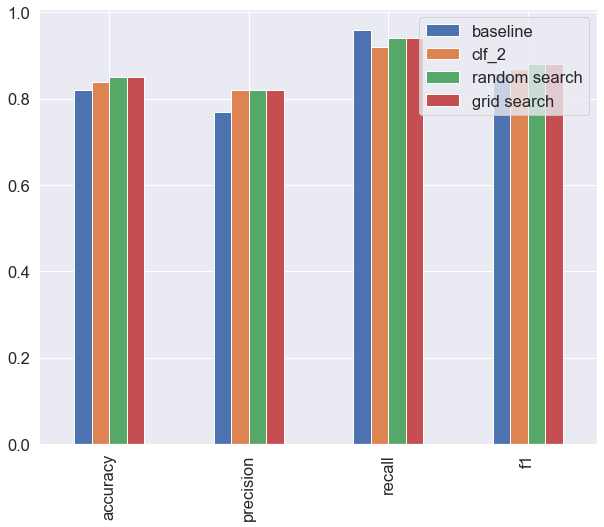

In [392]:
# Compare different model metrics

compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_metrics_2,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 8));

## 7. Saving & Loading ML Models

#### Two ways to save and load a ML model:
1. with Python's `pickle` module
2. with `joblib` module

### 7.1 `pickle` module

In [393]:
import pickle as pkl

# Saving the model
pkl.dump(gs_clf, open("gs-random-forest-model-1.pkl", "wb"))

In [403]:
# Loading the saved model
loaded_pkl_model = pkl.load(open("gs-random-forest-model-1.pkl", "rb"))

In [404]:
# Use it
np.random.seed(99)

loaded_y_preds = loaded_pkl_model.predict(X_test)
clf_evaluate_preds(y_test, loaded_y_preds)

Accuracy: 85.25%
Precision: 0.82
Recall: 0.94
F1: 0.88


{'accuracy': 0.85, 'precision': 0.82, 'recall': 0.94, 'f1': 0.88}

In [405]:
# check it with the original gs_clf
gs_metrics = clf_evaluate_preds(y_test, gs_y_preds)

Accuracy: 85.25%
Precision: 0.82
Recall: 0.94
F1: 0.88


### 7.2 `joblib` module

In [402]:
from joblib import dump, load

# Saving the model
dump(gs_clf, filename="gs-random-forest-model-1.joblib")

['gs-random-forest-model-1.joblib']

In [406]:
# Loading the model
loaded_joblib_model = load(filename="gs-random-forest-model-1.joblib")

In [407]:
# Use it
np.random.seed(99)

loaded_y_preds = loaded_joblib_model.predict(X_test)
clf_evaluate_preds(y_test, loaded_y_preds)

Accuracy: 85.25%
Precision: 0.82
Recall: 0.94
F1: 0.88


{'accuracy': 0.85, 'precision': 0.82, 'recall': 0.94, 'f1': 0.88}

In [408]:
# check it with the original gs_clf
gs_metrics = clf_evaluate_preds(y_test, gs_y_preds)

Accuracy: 85.25%
Precision: 0.82
Recall: 0.94
F1: 0.88


## 8. Putting it all together

In [412]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [413]:
data = pd.read_csv("Data/scikit-learn-data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [414]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [415]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

### Steps we want to do:

1. **Fill missing data**
2. **Ensure data is numerical**
3. **Build a model on the data**

In [419]:
# Get utility modules ready
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Get modelling modules ready  
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
np.random.seed(13)

# Import data and make it ready
data = pd.read_csv("data/scikit-learn-data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transform pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value="Missing")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ])
door_feature = ["Doors"]
door_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant", fill_value=4))
    ])
numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean"))
    ])

# Setup preprocessing steps
preprocessor = ColumnTransformer(
                    transformers=[
                        ("categorical", categorical_transformer, categorical_features),
                        ("door", door_transformer, door_feature),
                        ("numerical", numeric_transformer, numeric_features)
                    ])

# Create a preprocessing and modelling pipeline
model = Pipeline(
            steps=[
                ("preprocessor", preprocessor),
                ("model", RandomForestRegressor())
            ])

# Split data
X, y = data.drop("Price", axis=1), data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.25523973132372335

In [421]:
# Improve the model
pipe_grid = {
    "preprocessor__numerical__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 500, 1000],
    "model__max_depth": [None, 5, 10],
    "model__max_features": ["auto", "sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_

[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=500, preprocessor__numerical__imputer__strategy=median; total time=   0.6s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=500, preprocessor__numerical__imputer__strategy=median; total time=   0.6s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=500, preprocessor__numerical__imputer__strategy=median; total time=   0.6s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=500, preprocessor__numerical__imputer__strategy=median; total time=   0.6s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numerical__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_e

[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__numerical__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__numerical__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=100, preprocessor__numerical__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=4, model__n_estima

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=500, preprocessor__numerical__imputer__strategy=median; total time=   0.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=500, preprocessor__numerical__imputer__strategy=median; total time=   0.4s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numerical__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numerical__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numerical__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, prep

[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__numerical__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=500, pr

[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numerical__imputer__strategy=mean; total time=   0.7s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numerical__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numerical__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numerical__imputer__strategy=median; total time=   0.7s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=1000, preprocessor__numerical__imputer__strategy=median; total time=   0.7s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=4, model__n_estimators=1000, pr

[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__numerical__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_split=4, model__n_estimators=500, preprocessor__numerical__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_split=4, model__n_estimators=500, preprocessor__numerical__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_split=4, model__n_estimators=500, preprocessor__numerical__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_split=4, model__n_estimators=500, preprocessor__numerical__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=10, model__max_features=auto, model__min_samples_split=4, model__n_estimators=500, prep

[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numerical__imputer__strategy=median; total time=   0.8s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numerical__imputer__strategy=median; total time=   0.8s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numerical__imputer__strategy=median; total time=   1.0s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numerical__imputer__strategy=median; total time=   0.8s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__numerical__imputer__strategy=median; total time=   0.8s
[CV] END model__max_depth=10, model__max_features=sqrt, model__min_samples_split=4, model__n_estimat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='Missing',
                                                                                                        strategy='constant')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',


In [422]:
gs_model.best_params_

{'model__max_depth': 5,
 'model__max_features': 'sqrt',
 'model__min_samples_split': 4,
 'model__n_estimators': 100,
 'preprocessor__numerical__imputer__strategy': 'median'}

In [424]:
gs_model.score(X_test, y_test)

0.2785283627380496